In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_wine = pd.read_csv('wine.csv', header=None)

In [4]:
df_wine.columns = [ 'Class label','Alcohol','Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 'Flavanoids', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [5]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
from sklearn.cross_validation import train_test_split

C:\Users\sa-al\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

## L1 norm

#### MinMax (seting de difference bewteen max and min)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std,y_train)
print('Training_accuracy:', lr.score(X_train_std,y_train))

Training_accuracy: 0.983870967742


In [16]:
print('Test Accuracy:', lr.score(X_test_std,y_test))

Test Accuracy: 0.981481481481


In [17]:
lr.intercept_

array([-0.38384235, -0.15807384, -0.70044061])

In [18]:
lr.coef_

array([[ 0.27991645,  0.        ,  0.        , -0.0280283 ,  0.        ,
         0.        ,  0.70980005,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23649488],
       [-0.64400287, -0.06881438, -0.05719538,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92669387,
         0.06020289,  0.        , -0.37105449],
       [ 0.        ,  0.06158965,  0.        ,  0.        ,  0.        ,
         0.        , -0.63573877,  0.        ,  0.        ,  0.49794174,
        -0.35831509, -0.57160555,  0.        ]])

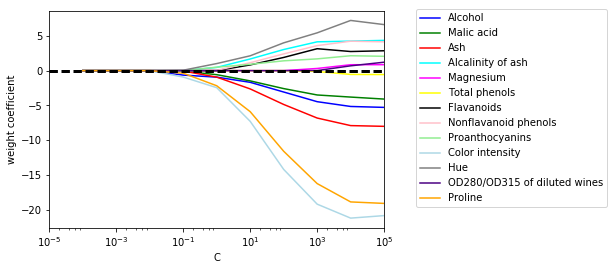

In [29]:
fig = plt.figure()
ax = plt.subplot(111)
colors= ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
         'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [],[]
for c in np.arange(-4,6):
    lr=LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label= df_wine.columns[column+1],color=color)
plt.axhline(0,color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc = 'upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

## L2 Norm

In [30]:
LogisticRegression(penalty='l2')
lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_train_std,y_train)
print('Training_accuracy:', lr.score(X_train_std,y_train))

Training_accuracy: 0.983870967742


In [31]:
print('Test Accuracy:', lr.score(X_test_std,y_test))

Test Accuracy: 0.981481481481


In [32]:
lr.intercept_

array([-0.64732881, -0.43279492, -0.83258577])

In [33]:
lr.coef_

array([[ 0.58228361,  0.04305595,  0.27096654, -0.53333363,  0.00321707,
         0.29820868,  0.48418851, -0.14789735, -0.00451997,  0.15005795,
         0.08295104,  0.38799131,  0.80127898],
       [-0.71490217, -0.35035394, -0.44630613,  0.32199115, -0.10948893,
        -0.03572165,  0.07174958,  0.04406273,  0.20581481, -0.71624265,
         0.39941835,  0.17538899, -0.72445229],
       [ 0.18373457,  0.32514838,  0.16359432,  0.15802432,  0.09025052,
        -0.20530058, -0.53304855,  0.1117135 , -0.21005439,  0.62841547,
        -0.4911972 , -0.55819761, -0.04081495]])

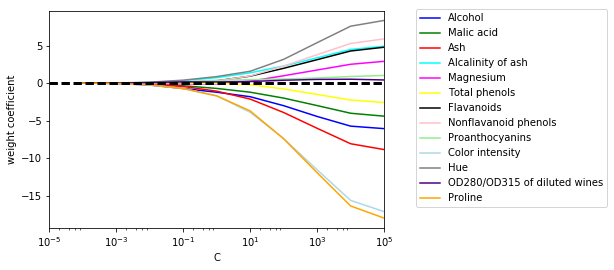

In [34]:
fig = plt.figure()
ax = plt.subplot(111)
colors= ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
         'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [],[]
for c in np.arange(-4,6):
    lr=LogisticRegression(penalty='l2', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label= df_wine.columns[column+1],color=color)
plt.axhline(0,color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc = 'upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()